In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

from utils import *
from plot_utils import *
from AnalyseDefects_dev import AnalyseDefects

In [16]:
LL = 512
data_suffix='fric' #'lambda_minus1'
suffix_list = ['01', '10']
output_path = f'data\\na{LL}{data_suffix}'
mode = 'all' # 'all' or 'short'

defect_list = []

for i, suffix in enumerate(suffix_list):
    data_dict = dict(path = f'X:\\na512exp\\na{LL}{data_suffix}{suffix}', \
                suffix = suffix, priority = 0, LX = LL, Nframes = 100)
    defect_list.append(data_dict)


count_suffix = "_periodic_rm0.1"

ad = AnalyseDefects(defect_list, output_path=output_path, count_suffix=count_suffix,)

extract = False
analyze = True
merge = False

if extract:
    ad.extract_results()
if analyze:
    ad.analyze_defects()
if merge:
    ad.merge_results()

Structure factor not found. Extract results first.
Structure factor not found. Extract results first.


c:\Users\Simon Andersen\Projects\Projects\Thesis\NematicAnalysis\AnalyseDefects_dev.py:1262: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[j].set_ylim(mini, maxi)


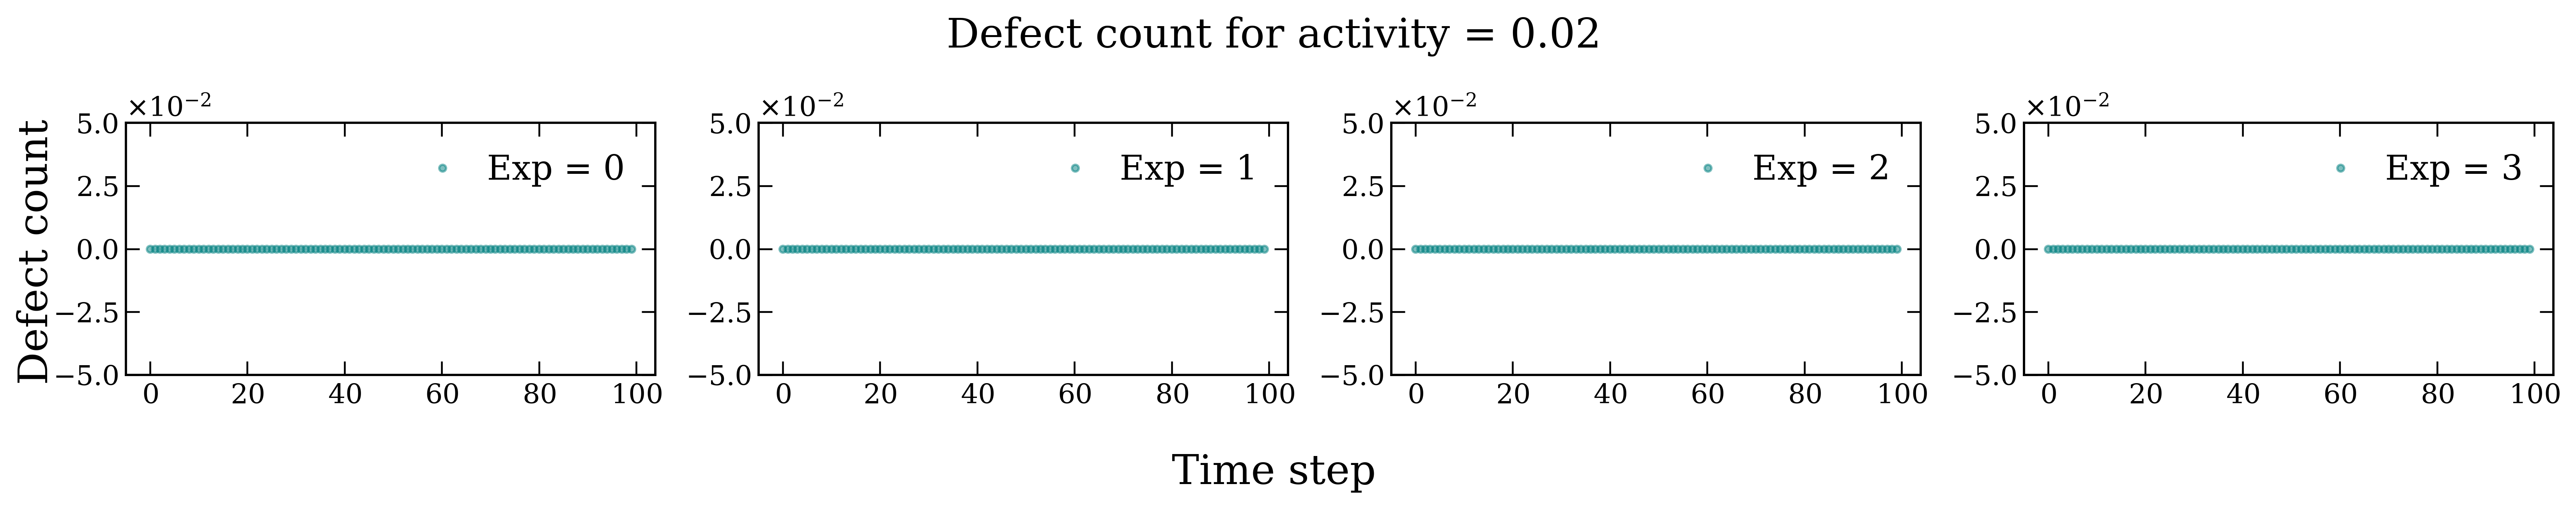

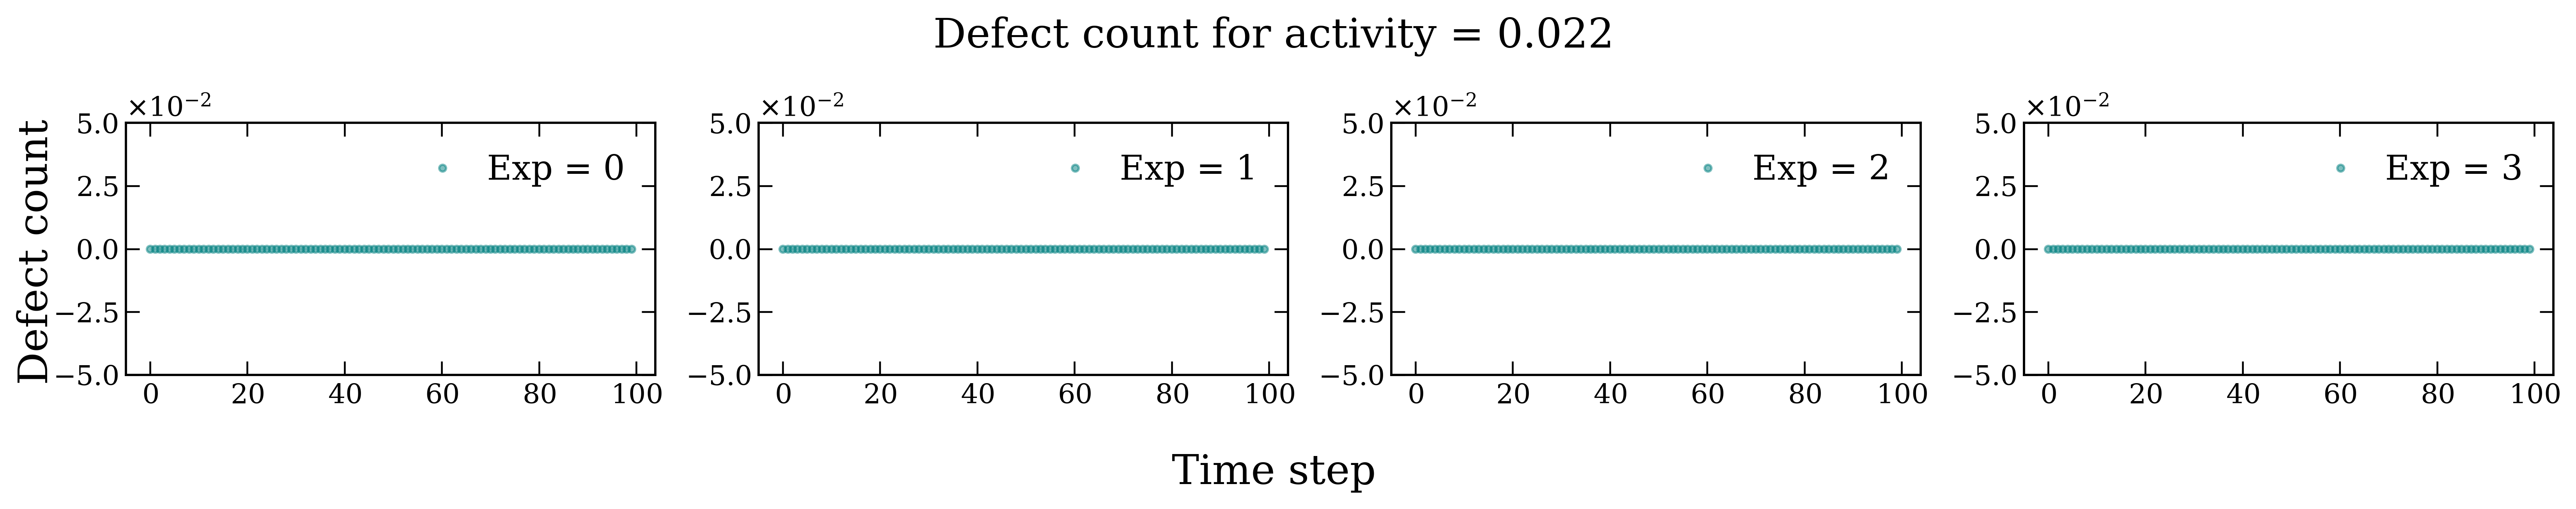

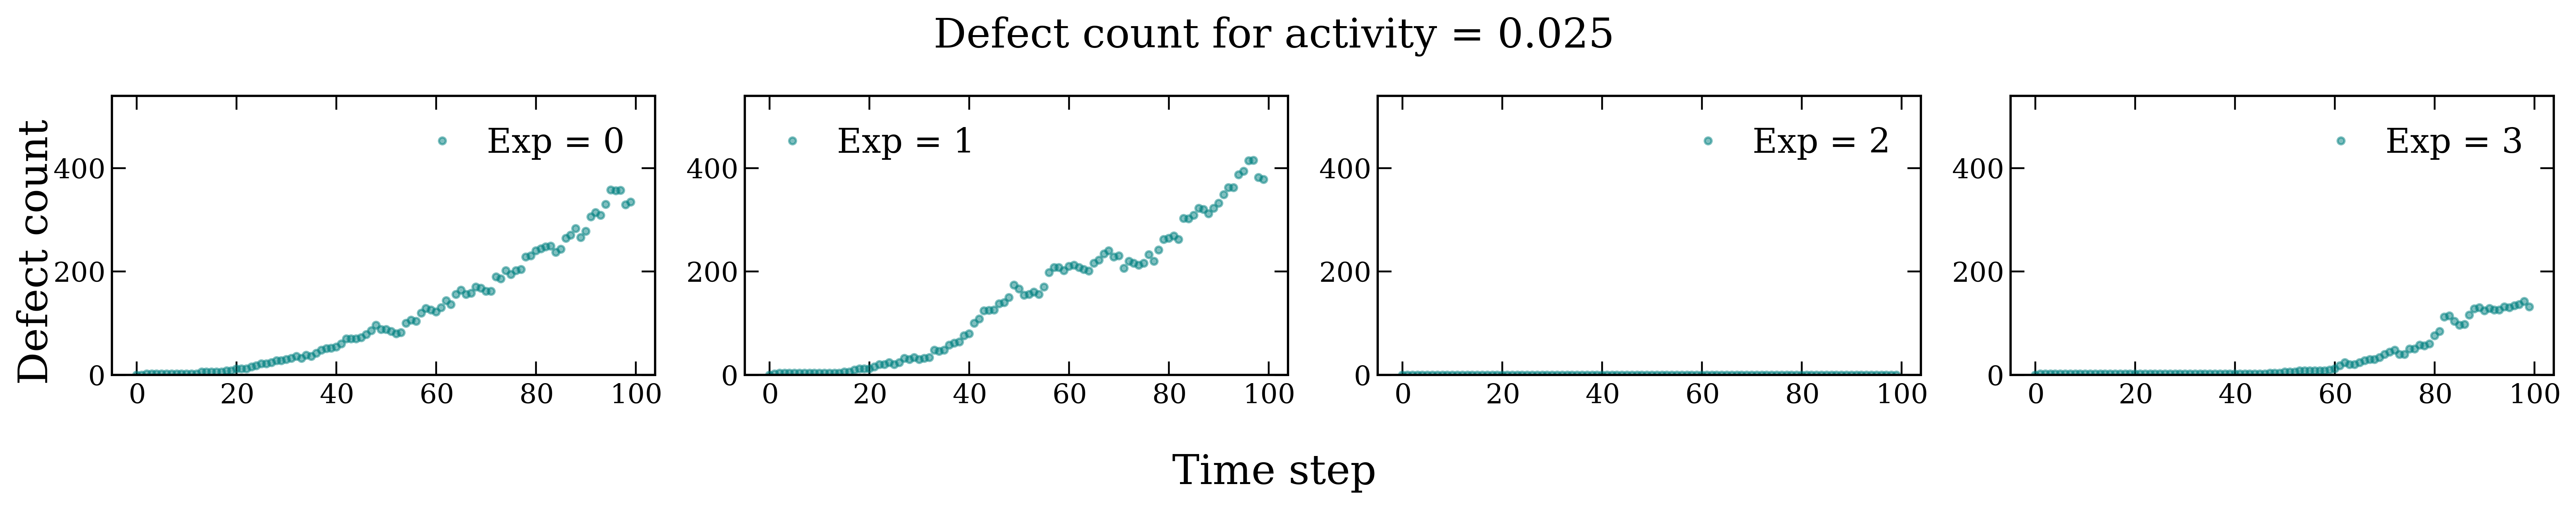

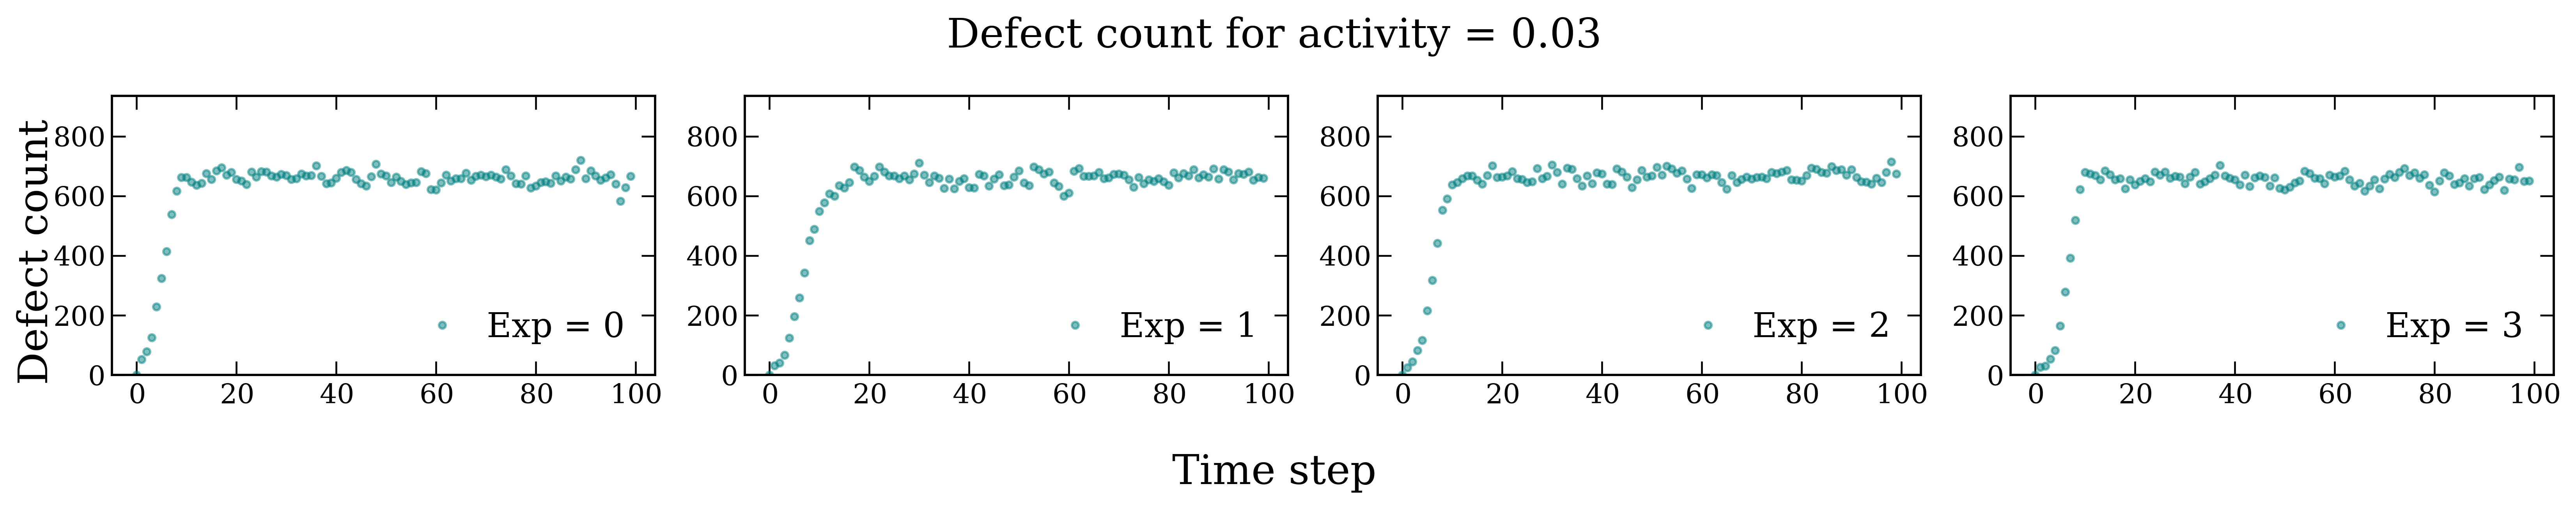

In [46]:
ad.plot_defects_per_exp(1, act_idx_bounds=[3,7])

c:\Users\Simon Andersen\Projects\Projects\Thesis\NematicAnalysis\AnalyseDefects_dev.py:1221: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax[i].set_ylim(0, np.nanmax(defect_arr_av[:, act_idx, 0]) * 1.5)


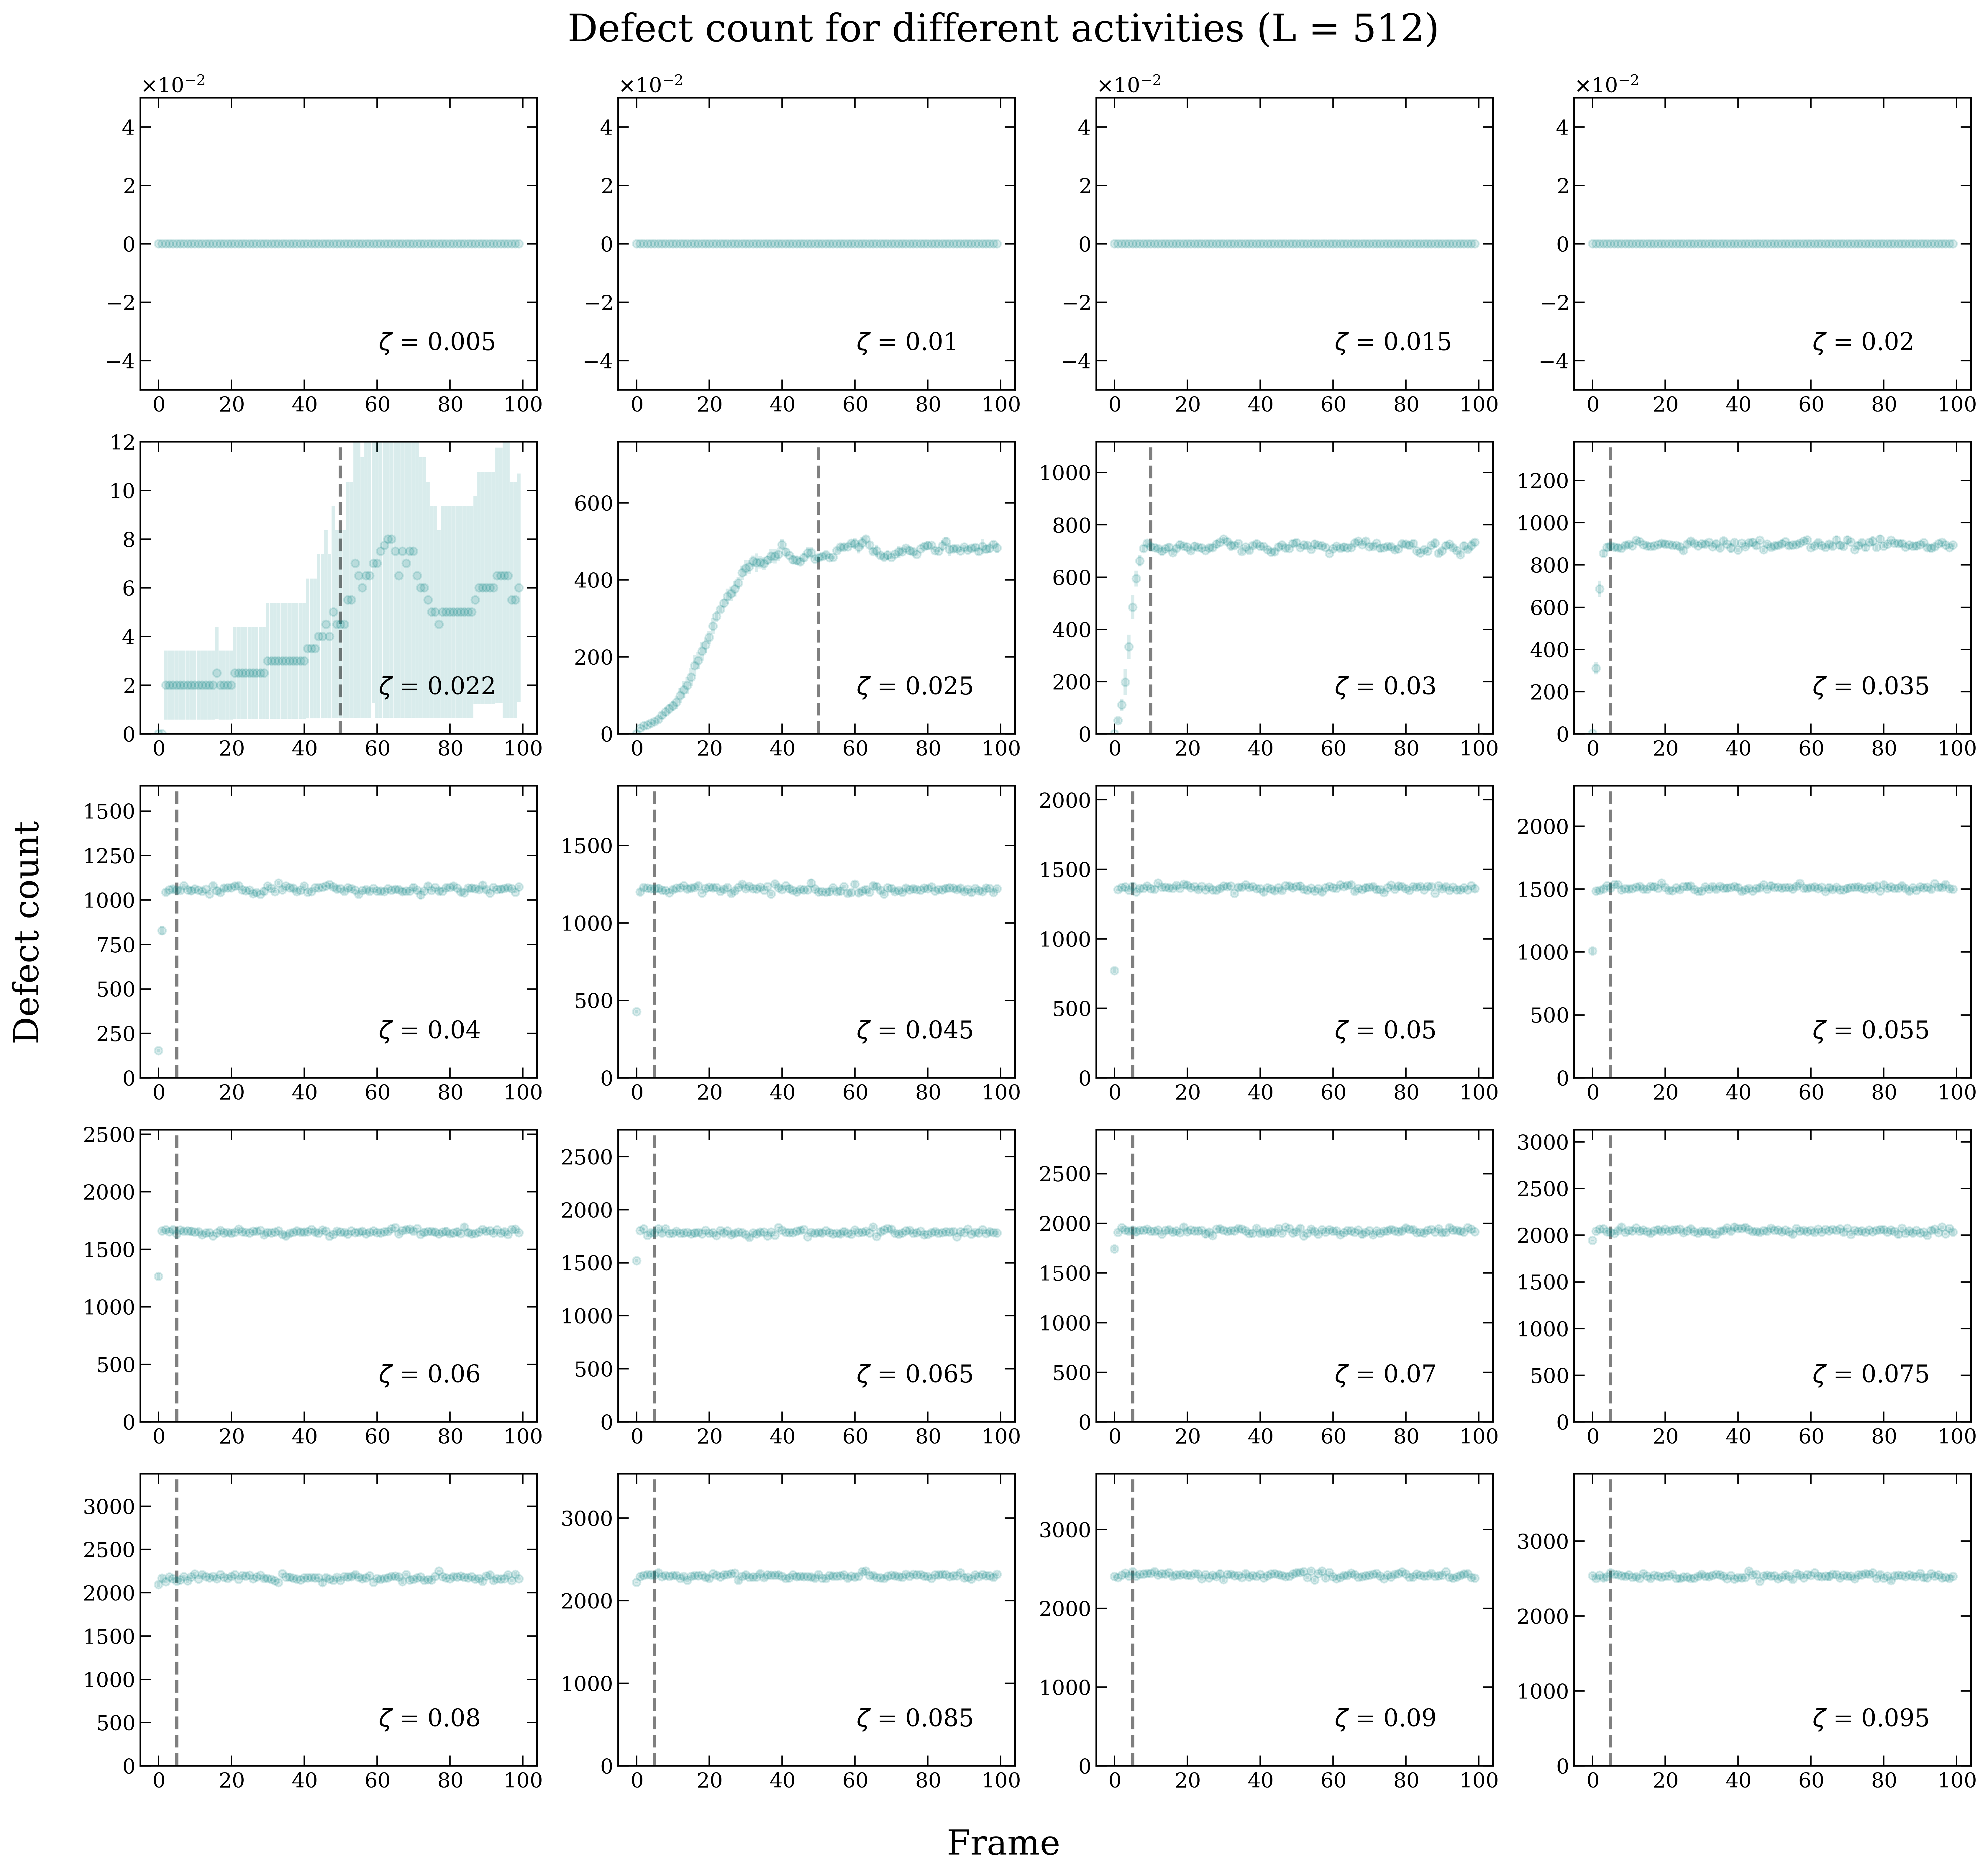

(<Figure size 6720x6300 with 20 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >], dtype=object))

In [43]:
ad.plot_defects_per_activity(0)

Text(0, 0.5, 'Defect density')

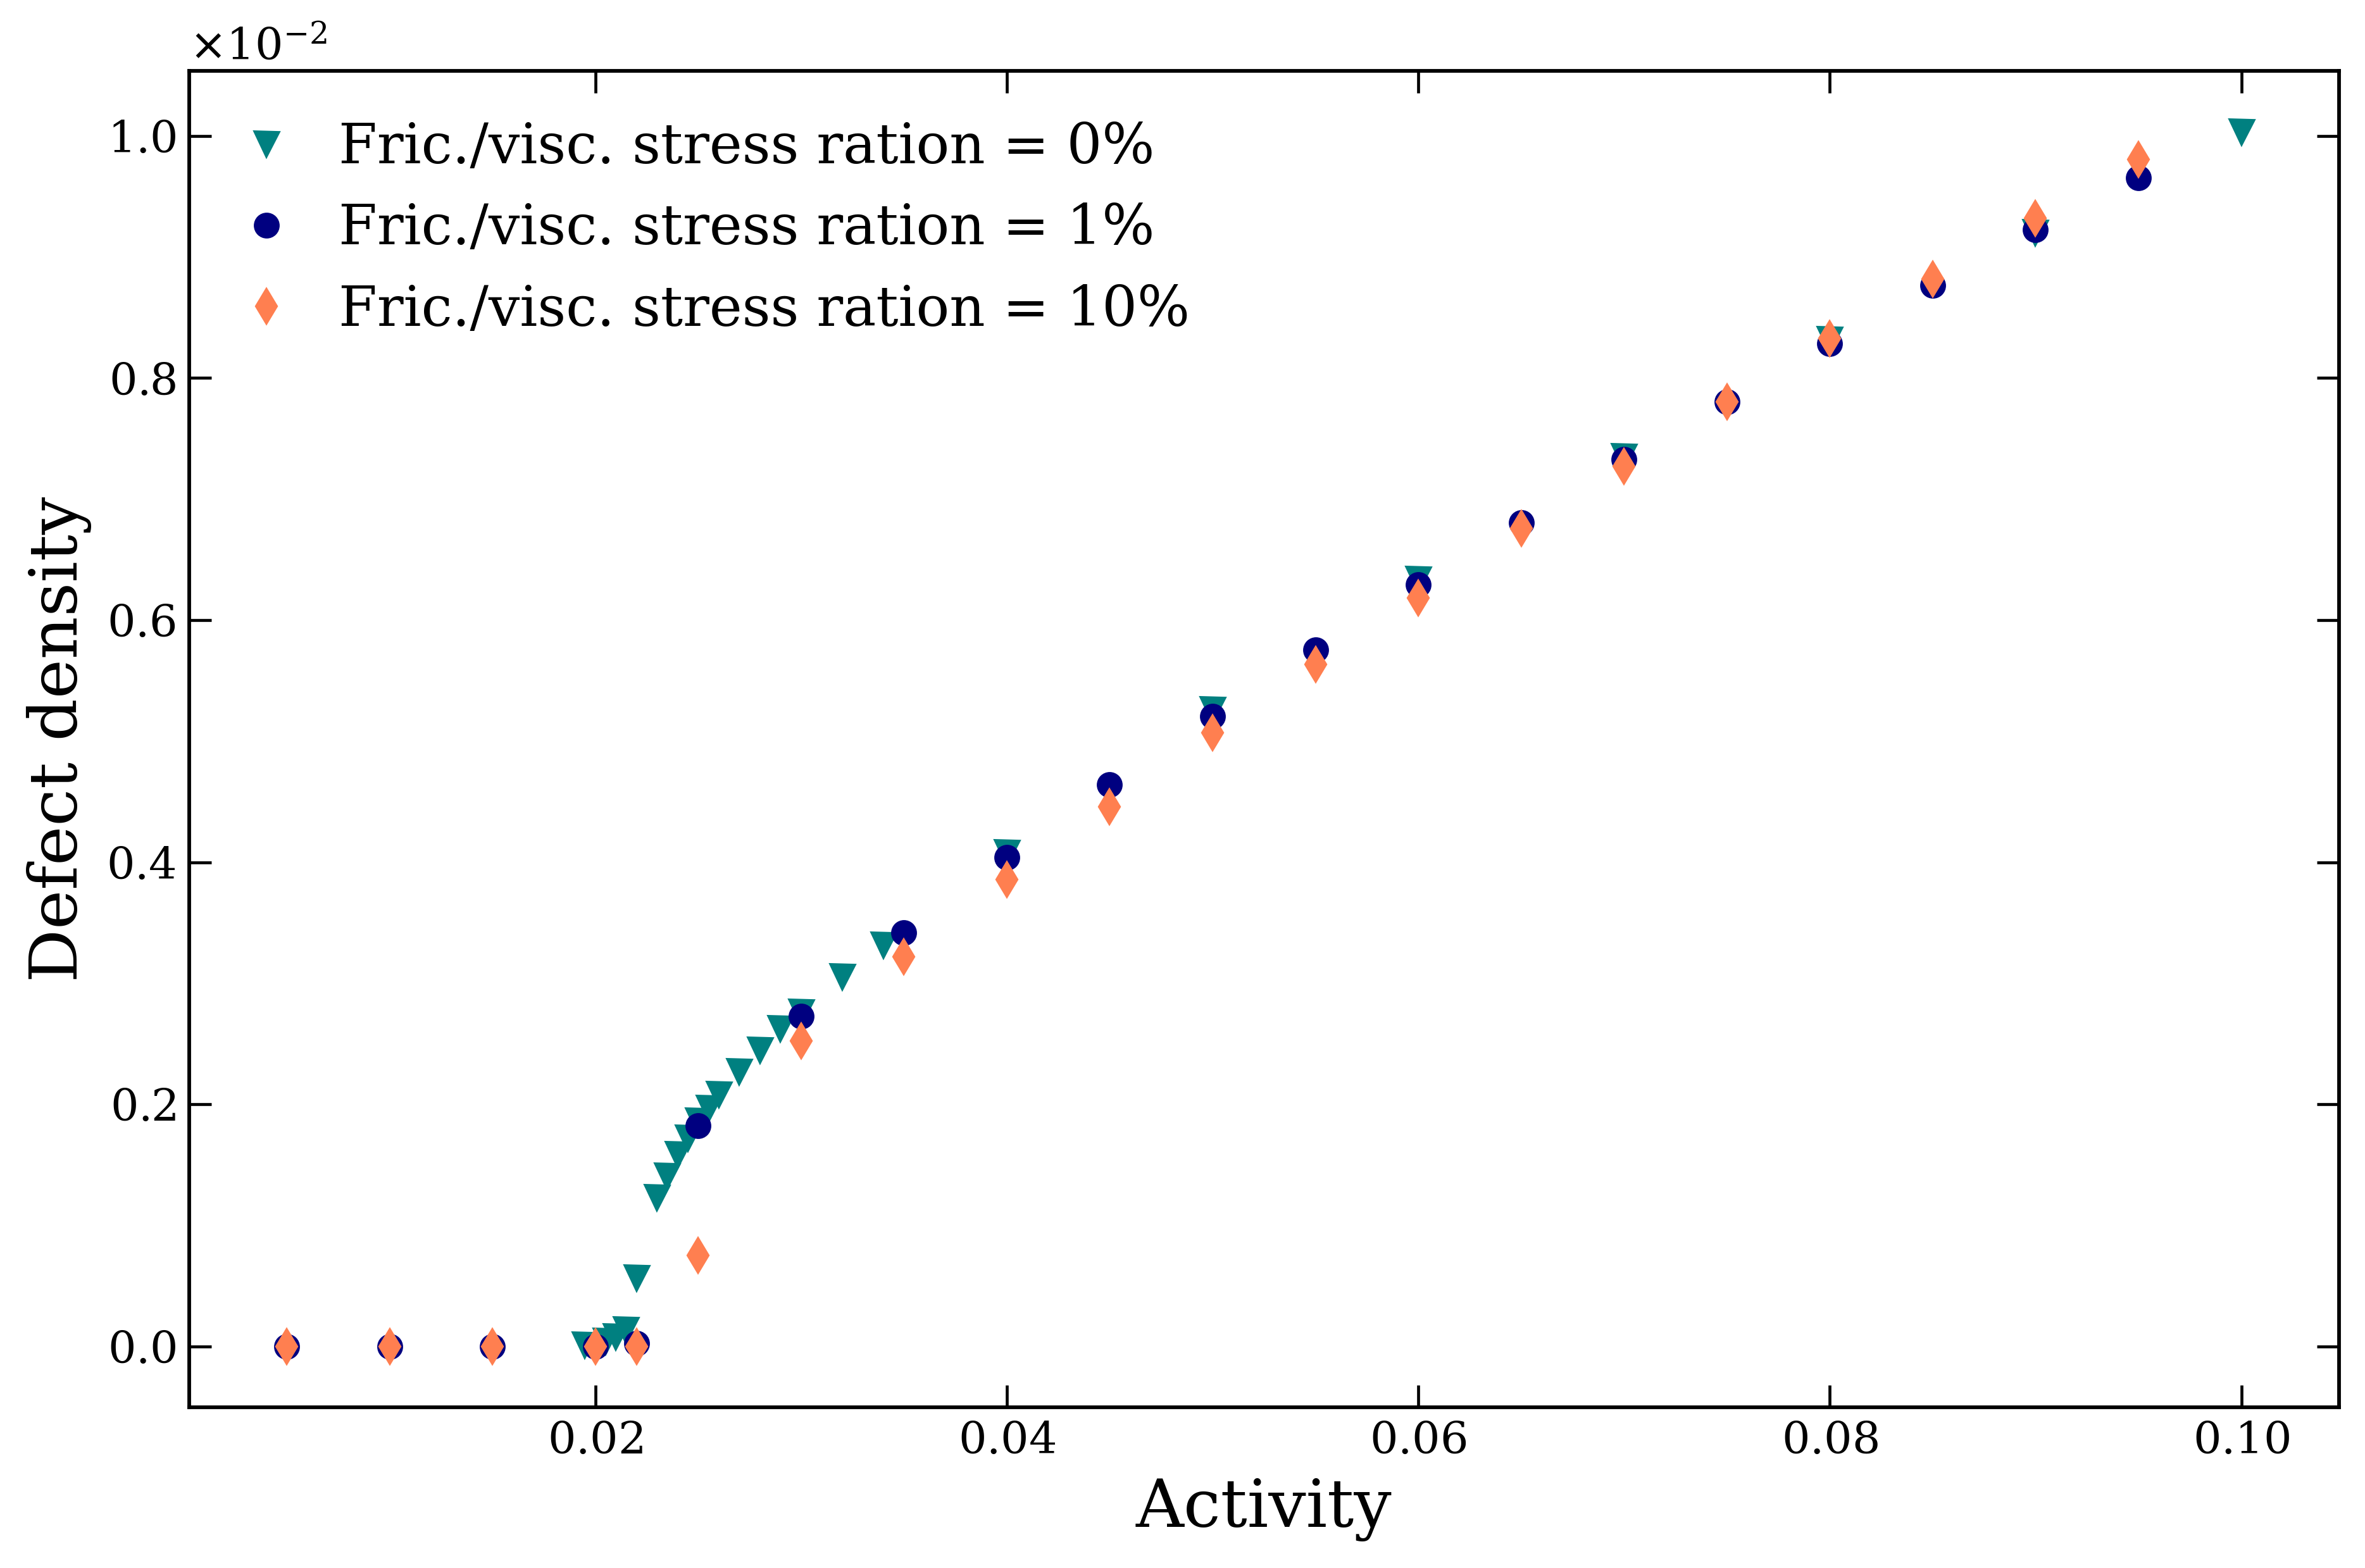

In [24]:
av0 = np.array([[4.4896, 0.06704821500530343],
 [11.827266666666667, 0.3007592128234107],
 [21.107866666666666, 0.49893087539420017],
 [36.778666666666666, 1.3560018125843702],
 [148.5518, 3.3198762070183743],
 [323.16675, 2.2227851825267266],
 [370.28425, 2.9789323581365013],
 [417.07175, 1.9030656635460934],
 [451.3674033149171, 2.01536913074597],
 [489.1569060773481, 1.889969997879238],
 [516.4779005524862, 2.0073879280652216],
 [546.7994475138122, 1.6346501049844329],
 [595.8182320441989, 1.6174364507011998],
 [642.2922651933702, 1.500550470268117],
 [688.8878453038674, 1.5485760786554152],
 [724.1298342541437, 1.6230670061028853],
 [801.9508287292817, 1.3480766779817566],
 [870.5530386740331, 1.5438090623772185],
 [1070.6524861878454, 1.5103953668371957],
 [1379.0729281767956, 1.541979642066229],
 [1662.6563535911603, 1.5581652500271632],
 [1927.5900552486187, 1.5330472695390116],
 [2180.756906077348, 1.6536737032307842],
 [2413.2160220994474, 1.6754269695318387],
 [2630.939226519337, 1.6665297469120222]])
act0 = np.array([0.0195, 0.0205, 0.021, 0.0215, 0.022, 0.023, 0.0235, 0.024, 0.0245, 0.025, 0.0255, 0.026, 0.027, 0.028, 0.029, 0.03, 0.032, 0.034, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
plt.plot(act0, av0[:,0]/512**2, 'v',  label='Fric./visc. stress ration = 0%' )

for i, suffix in enumerate(ad.suffixes):
    av = ad.get_arrays_av(i)[-1]
    act = ad.act_list[i]
    ratio = 1
    X=np.array(act) * ratio
    plt.plot(X,av[:,0]/512**2,'o' if i==0 else 'd', label='Fric./visc. stress ration = '+ (suffix[-1] if i==0 else suffix) + r'%')

plt.legend()
plt.xlabel(r'Activity')
plt.ylabel(r'Defect density')

In [28]:
# hyperuniformity parameters
act_idx_bounds=[0,None]
Npoints_to_fit = 20
pval_min = 0.05

dens_fluc_dict = dict(act_idx_bounds = [0, None], window_idx_bounds = [50 - Npoints_to_fit, None])
    
ad.analyze_defects(dens_fluc_dict=dens_fluc_dict,)

Structure factor not found. Extract results first.
Non-converged fits (p < 0.05):  0
Structure factor not found. Extract results first.
Non-converged fits (p < 0.05):  2


In [33]:
ad.output_paths

['data\\na512fric\\01', 'data\\na512fric\\10']

In [34]:
fit_params = np.load(f'{ad.output_paths[0]}\\fit_params_count.npy')

In [35]:
fit_params.shape

(20, 4)

In [ ]:
sus = ad.get_susceptibility(-1)
for i, suffix in enumerate(ad.suffixes):
    act = ad.act_list[i]
    fit_params = np.load(f'{ad.output_paths[i]}\\fit_params_count.npy')
    plt.errorbar(act, fit_params[:,0], yerr=fit_params[:,2], fmt='o' if i==0 else 'd', label='Fric./visc. stress ratio = '+ (suffix[-1] if i==0 else suffix) + r'%')
plt.legend()


In [ ]:
for Ndataset in range(ad.Ndata):
    ad.plot_defects_per_activity(Ndataset=Ndataset, save=True)
ad.plot_defects_per_activity(use_merged=True, save=True)

In [ ]:
for Ndataset in range(ad.Ndata):
    ad.plot_hyperuniformity_sfac(Ndataset=Ndataset, weighted=False, save = True);